In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
from tensorflow.keras import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *

In [23]:
trainpath='/kaggle/input/shoes-classification-dataset-13k-images/Shoes Dataset/Train/'
testpath='/kaggle/input/shoes-classification-dataset-13k-images/Shoes Dataset/Test/'
predpath='/kaggle/input/shoes-classification-dataset-13k-images/Shoes Dataset/Valid/'

In [24]:
for folder in os.listdir(trainpath):
    files=gb.glob(pathname=str(trainpath+folder+'/*'))
    print(f'for training data,found{len(files)} in folder {folder}')

for training data,found2000 in folder Brogue
for training data,found2000 in folder Clog
for training data,found2000 in folder Boat
for training data,found2000 in folder Sneaker
for training data,found2000 in folder Ballet Flat


In [25]:
for folder in os.listdir(testpath):
    files=gb.glob(pathname=str(testpath+folder+'/*'))
    print(f'for testing data,found{len(files)} in folder {folder}')

for testing data,found192 in folder Brogue
for testing data,found424 in folder Clog
for testing data,found236 in folder Boat
for testing data,found266 in folder Sneaker
for testing data,found97 in folder Ballet Flat


In [26]:
code={'Brogue':0,'Clog':1,'Boat':2,'Sneaker':3,'Ballet Flat':4}
def getcode(n):
    for x,y in code.items():
        if n==y:
            return x
        

In [27]:
size=[]
for folder in os.listdir(trainpath):
    files=gb.glob(pathname=str(trainpath+folder+'/*'))
    for file in files:
        image=plt.imread(file)
        size.append(image.shape)
pd.Series(size,dtype=object).value_counts()

(225, 225, 3)    2315
(275, 183, 3)    1008
(259, 194, 3)     994
(183, 275, 3)     391
(254, 199, 3)     311
                 ... 
(367, 137, 3)       1
(128, 114, 3)       1
(124, 400, 3)       1
(250, 167, 3)       1
(286, 176, 3)       1
Length: 479, dtype: int64

In [28]:
s=100


In [29]:
x_train = []
y_train = []
for folder in os.listdir(trainpath):
    files = gb.glob(pathname= str(trainpath+folder+'/*'))
    for file in files :
        imag = cv2.imread(file)
        imag_array = cv2.resize(imag,(s,s))
        x_train.append(list(imag_array))
        y_train.append(code[folder])
    

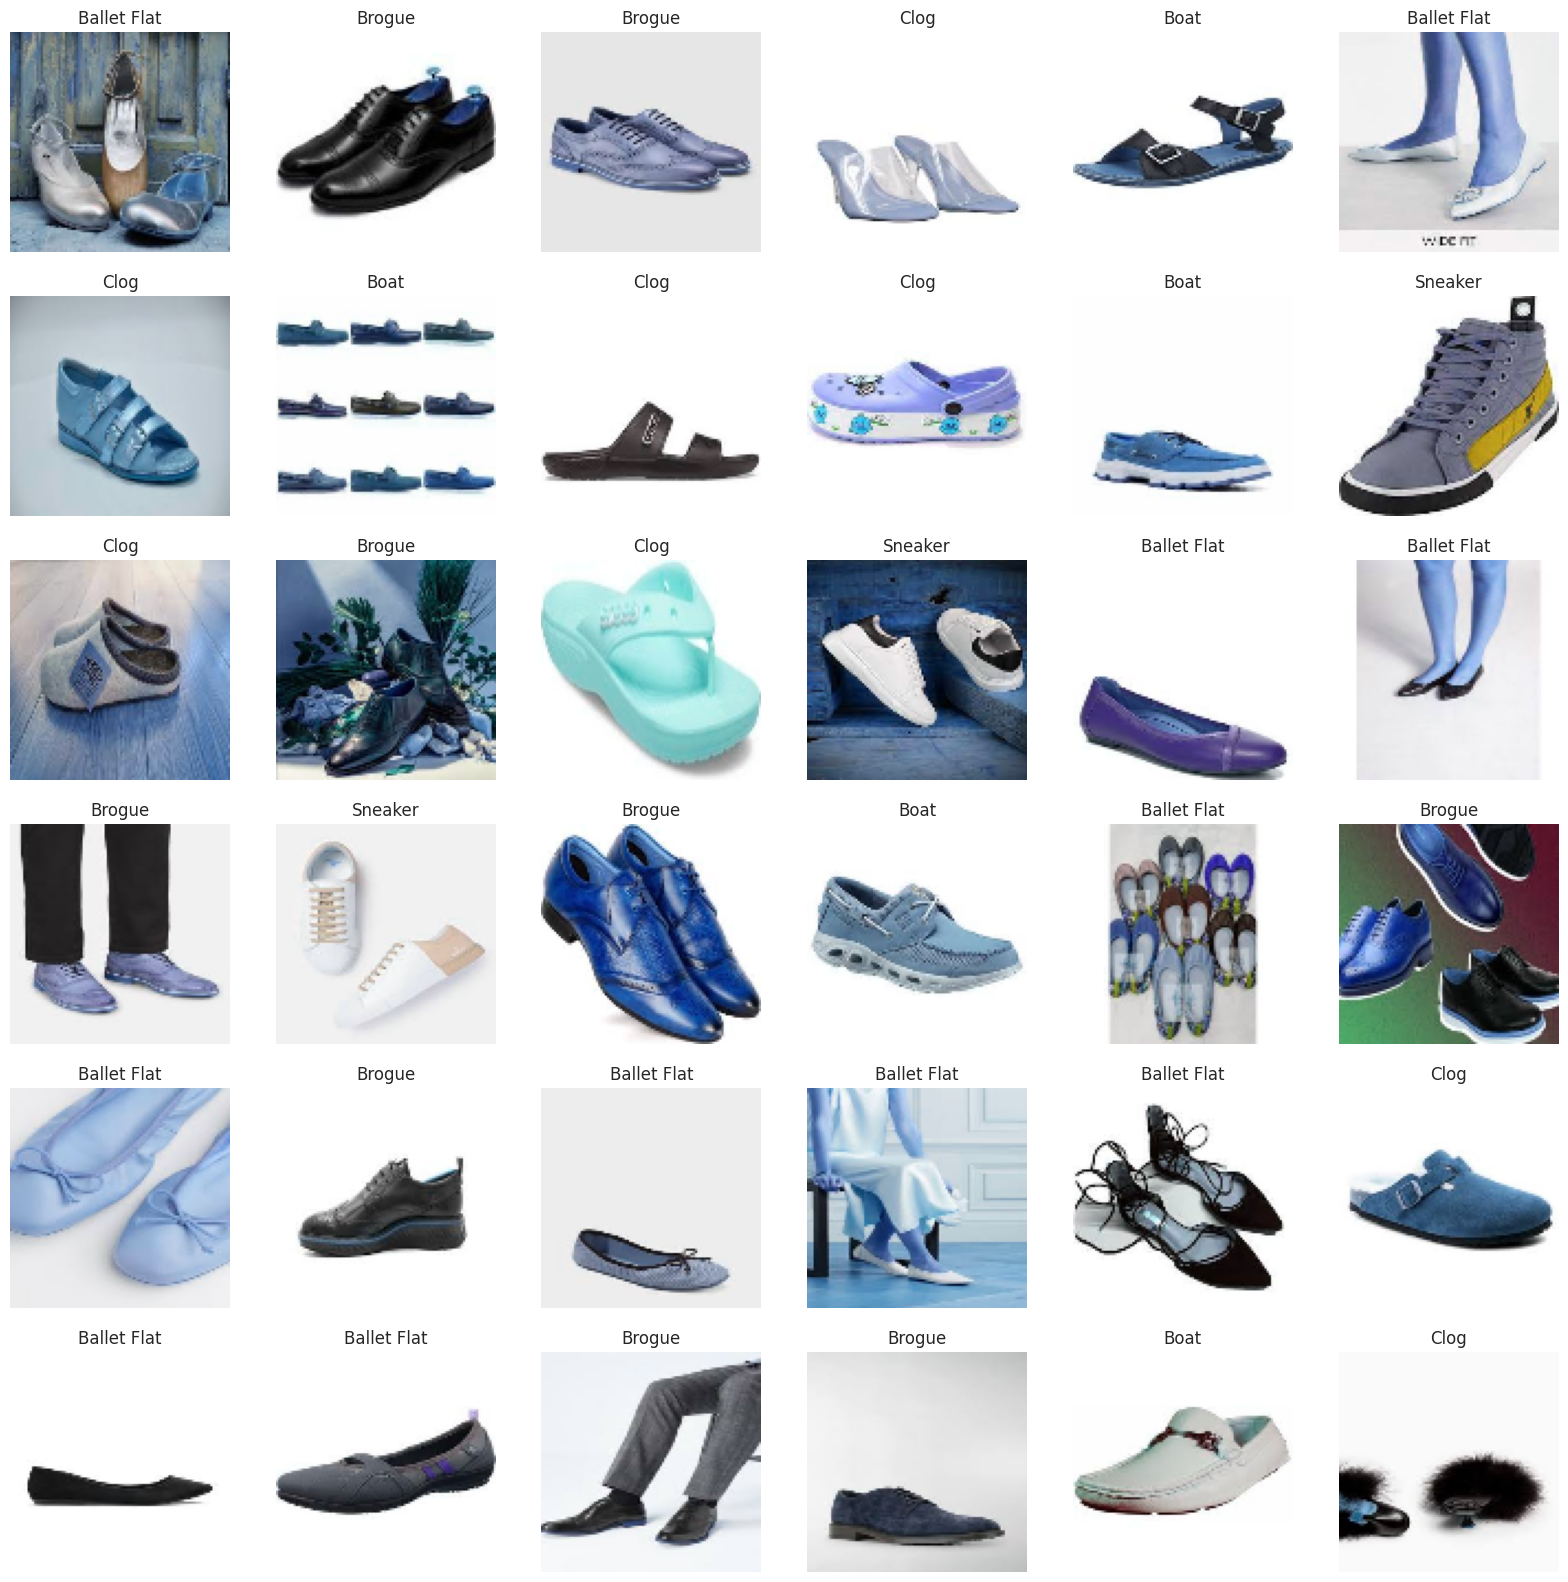

In [11]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [30]:
x_test = []
y_test = []
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str(testpath + folder + '/*'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        x_test.append(list(image_array))
        y_test.append(code[folder])

In [31]:
x_pred = []
for folder in  os.listdir(predpath) : 
    files = gb.glob(pathname= str(predpath +folder+ '/*'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        x_pred.append(list(image_array))

In [32]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
x_pred = np.array(x_pred)
y_test = np.array(y_test)
print(f'X_train shape  is {x_train.shape}')
print(f'X_test shape  is {x_test.shape}')
print(f'X_pred shape  is {x_pred.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')



X_train shape  is (10000, 100, 100, 3)
X_test shape  is (1215, 100, 100, 3)
X_pred shape  is (2500, 100, 100, 3)
y_train shape  is (10000,)
y_test shape  is (1215,)


In [33]:
def get_callback(model_name):
  callbacks=[]
  chechpoints=tf.keras.callbacks.ModelCheckpoint(filepath=f'model.{model_name}.h5',verbose=1,monitor='val_loss')
  callbacks.append(chechpoints)
  anne=ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=5,verbose=2,min_lr=0.0000001,min_delta=0.00001)
  callbacks.append(anne)
  earlystop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
  callbacks.append(earlystop)
  return callbacks


In [34]:
basemodel=tf.keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=(100,100,3),
)
basemodel.trainable=True
X=basemodel.output
X=GlobalAveragePooling2D()(X)
predictions=Dense(5,activation='softmax',name='Final')(X)
model=Model(inputs=basemodel.input,outputs=predictions)
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [35]:
val_df=tf.keras.preprocessing.image_dataset_from_directory(
"/kaggle/input/shoes-classification-dataset-13k-images/Shoes Dataset/Valid/",
    image_size=(100,100),
    batch_size=64,
)

Found 2500 files belonging to 5 classes.


In [36]:
callbacks=get_callback('dense121')
history=model.fit(x_train, y_train, epochs=10, validation_data=val_df, batch_size=64,verbose=1,callbacks=[callbacks])


Epoch 1/10
157/157 [==============================] - ETA: 0s - loss: 1.0857 - accuracy: 0.5831
Epoch 1: saving model to model.dense121.h5
157/157 [==============================] - 73s 202ms/step - loss: 1.0857 - accuracy: 0.5831 - val_loss: 4.2354 - val_accuracy: 0.1280 - lr: 0.0010
Epoch 2/10
157/157 [==============================] - ETA: 0s - loss: 0.7097 - accuracy: 0.7475
Epoch 2: saving model to model.dense121.h5
157/157 [==============================] - 29s 183ms/step - loss: 0.7097 - accuracy: 0.7475 - val_loss: 3.2146 - val_accuracy: 0.1360 - lr: 0.0010
Epoch 3/10
157/157 [==============================] - ETA: 0s - loss: 0.5404 - accuracy: 0.8059
Epoch 3: saving model to model.dense121.h5
157/157 [==============================] - 28s 179ms/step - loss: 0.5404 - accuracy: 0.8059 - val_loss: 4.1231 - val_accuracy: 0.1256 - lr: 0.0010
Epoch 4/10
157/157 [==============================] - ETA: 0s - loss: 0.4120 - accuracy: 0.8599
Epoch 4: saving model to model.dense121.h5
157

In [37]:
ModelLoss, ModelAccuracy = model.evaluate(x_test, y_test)#testing
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

38/38 [==============================] - 3s 46ms/step - loss: 1.3314 - accuracy: 0.7597
Test Loss is 1.3314290046691895
Test Accuracy is 0.7596707940101624


38/38 [==============================] - 1s 26ms/step


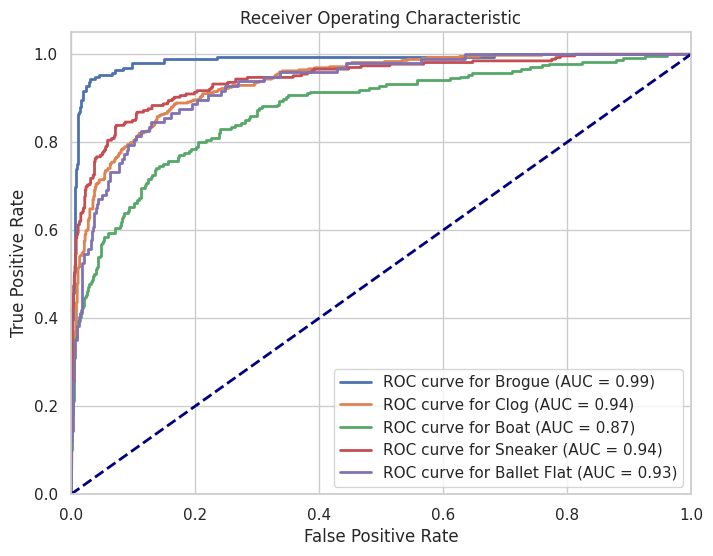

In [46]:
from sklearn.metrics import roc_curve, auc

# Generate predictions for the test set
y_pred = model.predict(x_test)

# Calculate the false positive rate, true positive rate, and threshold for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(code)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i, label in zip(fpr.keys(), class_labels):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve for %s (AUC = %0.2f)' % (label, roc_auc[i]))
# Plot the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set the limits of the x- and y-axis
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Add labels and legend to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# ***to make a confusion matrix for your model, you can use the sklearn.metrics.confusion_matrix function.***

38/38 [==============================] - 1s 26ms/step


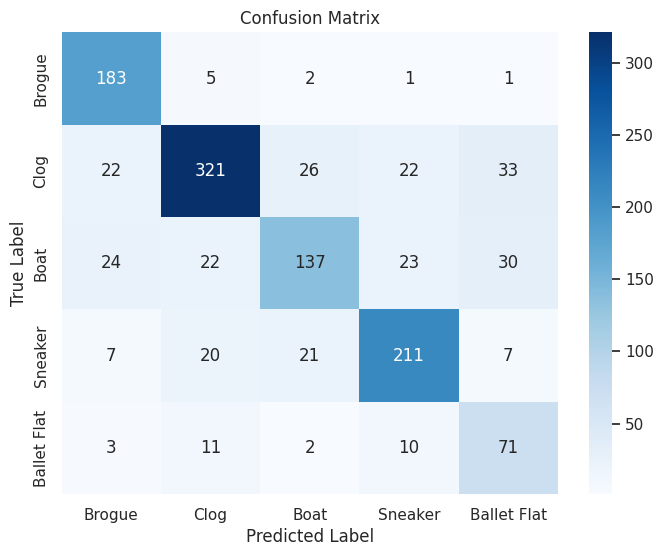

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

class_labels = ['Brogue', 'Clog', 'Boat', 'Sneaker', 'Ballet Flat']

conf_mat = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, cmap="Blues", annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ***This code first predicts the class labels for the test set using the model.predict method***

In [41]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes, target_names=class_labels))

38/38 [==============================] - 1s 26ms/step
              precision    recall  f1-score   support

      Brogue       0.77      0.95      0.85       192
        Clog       0.85      0.76      0.80       424
        Boat       0.73      0.58      0.65       236
     Sneaker       0.79      0.79      0.79       266
 Ballet Flat       0.50      0.73      0.59        97

    accuracy                           0.76      1215
   macro avg       0.73      0.76      0.74      1215
weighted avg       0.77      0.76      0.76      1215



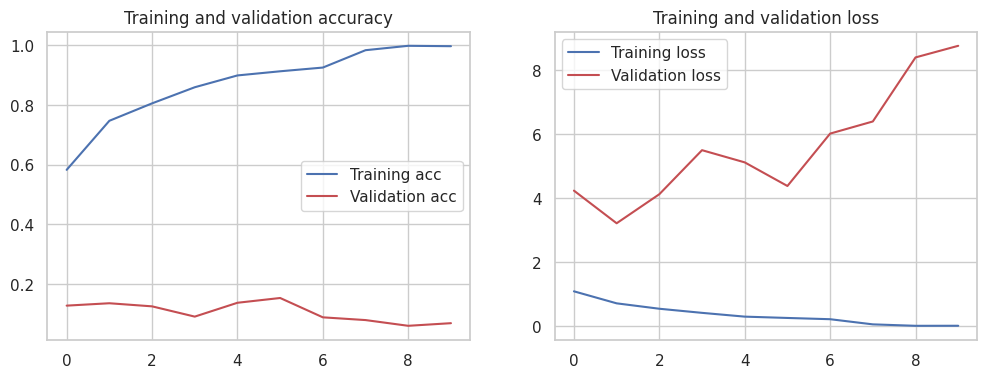

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()